## Loan Approval Prediction

In [1]:
# import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
import os
os.getcwd()

'/Users/carolyne/Downloads'

In [6]:
# Load dataset
df = pd.read_csv('/Users/carolyne/Downloads/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
# Remove loan ID column
df = df.drop('Loan_ID', axis=1)

In [8]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Data Cleaning

In [9]:
# Check dataset for null values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# Run a quick summary statistics of the dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
# Find out what kind of data types the dataset contains
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
# Replace Nan/null values with mode, median, and mean. Delete if necessary

In [13]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)


/var/folders/ch/_ftp931s1fxcx5_lkqmf4zrm0000gp/T/ipykernel_43408/131057347.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)


In [14]:
df['Married'].fillna(df['Married'].mode()[0], inplace = True)

/var/folders/ch/_ftp931s1fxcx5_lkqmf4zrm0000gp/T/ipykernel_43408/1821425727.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Married'].fillna(df['Married'].mode()[0], inplace = True)


In [15]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)

/var/folders/ch/_ftp931s1fxcx5_lkqmf4zrm0000gp/T/ipykernel_43408/4175059458.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)


In [16]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)

/var/folders/ch/_ftp931s1fxcx5_lkqmf4zrm0000gp/T/ipykernel_43408/207334024.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)


In [18]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace = True)

/var/folders/ch/_ftp931s1fxcx5_lkqmf4zrm0000gp/T/ipykernel_43408/2585548429.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace = True)


In [19]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)

/var/folders/ch/_ftp931s1fxcx5_lkqmf4zrm0000gp/T/ipykernel_43408/1114356315.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)


In [20]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

/var/folders/ch/_ftp931s1fxcx5_lkqmf4zrm0000gp/T/ipykernel_43408/650941709.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)


In [21]:
# After removing null values confirm for possible null values in the dataset
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
# Check for duplicates
df.duplicated().sum()

0

## Exploratory Data Analysis

In [23]:
# Find the number of loan statuses with 'Y' and 'N' values
loan_status_count = df['Loan_Status'].value_counts()
loan_status_count

Loan_Status
Y    422
N    192
Name: count, dtype: int64

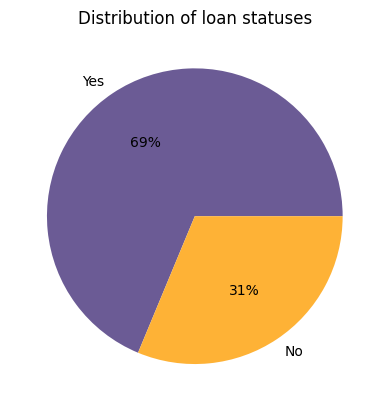

In [24]:
# Plot a pie chart on loan statuses
colors = ['#6b5b95', '#feb236']
labels = ['Yes', 'No']
plt.pie(loan_status_count, autopct='%.0f%%', labels= labels, colors = colors)

plt.title('Distribution of loan statuses')
plt.show()

In [25]:
# Check the number of values in the gender column
gender_count = df['Gender'].value_counts()
gender_count

Gender
Male      502
Female    112
Name: count, dtype: int64

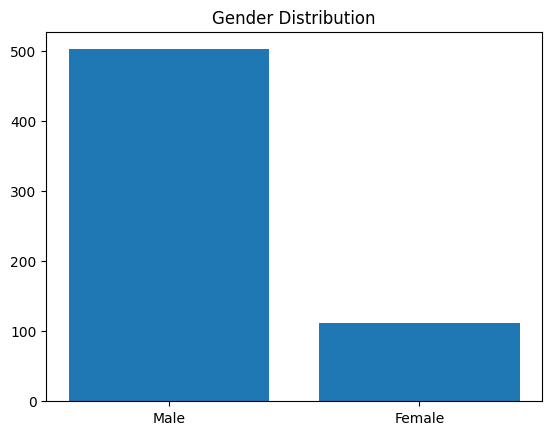

In [26]:
# Plot a bar chart showing gender distribution in the data set
plt.bar(gender_count.index, gender_count.values)
plt.title('Gender Distribution')

plt.show()

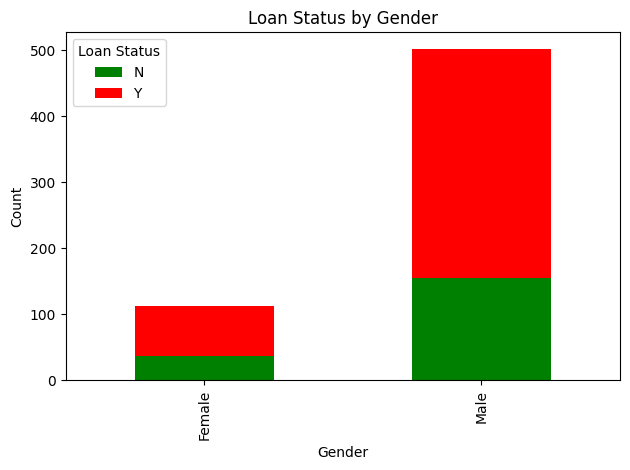

In [27]:
# Count values by Gender and Loan_Status
count_data = df.groupby(['Gender', 'Loan_Status']).size().unstack(fill_value=0)

# Plotting stacked bar chart
count_data.plot(kind='bar', stacked=True, color=['green', 'red'])

plt.title('Loan Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()


In [28]:
# Count the distribution of dependents in the data set
dependents_count = df['Dependents'].value_counts()
dependents_count

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

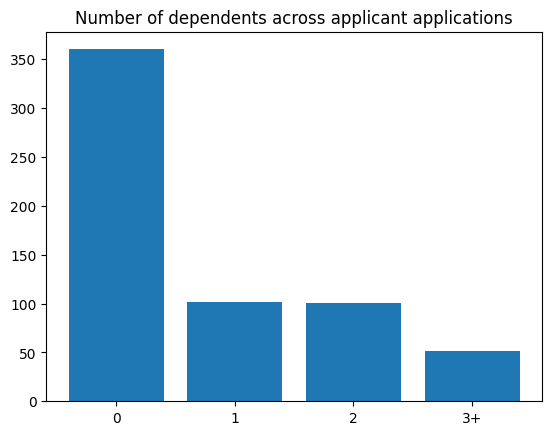

In [29]:
# Plot a bar chart visualizing the distribution of dependents among loan applicants
plt.bar(dependents_count.index, dependents_count.values)
plt.title('Number of dependents across applicant applications')

plt.show()

In [30]:
# Count the distribution of marital status in the data set
married_dist = df['Married'].value_counts()
married_dist

Married
Yes    401
No     213
Name: count, dtype: int64

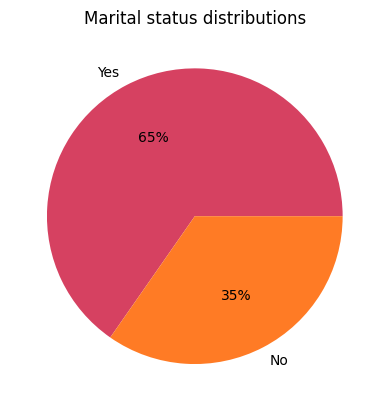

In [31]:
# Plot a pie chart showing the distribution of marital statuses 
colors = ['#d64161', '#ff7b25']
labels = ['Yes', 'No']
plt.pie(married_dist, autopct='%.0f%%', labels= labels, colors = colors)

plt.title('Marital status distributions')
plt.show()

In [32]:
# Count the number of self_employed applicants
self_employed_counts = df['Self_Employed'].value_counts()
self_employed_counts

Self_Employed
No     532
Yes     82
Name: count, dtype: int64

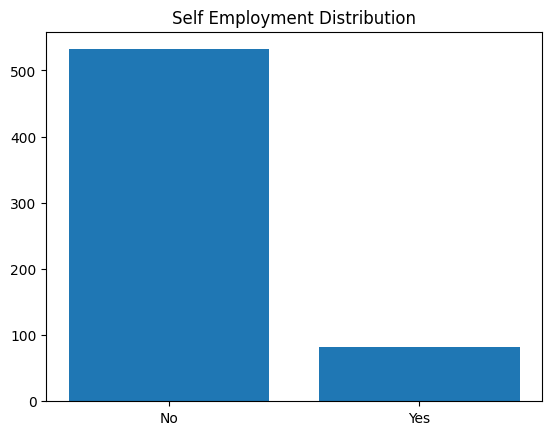

In [33]:
# Plot a self employment distribution bar chart
plt.bar(self_employed_counts.index, self_employed_counts.values)
plt.title('Self Employment Distribution')
plt.show()

In [34]:
# Count the number of graduates and non-graduates in the data set
education_dist = df['Education'].value_counts()
education_dist

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

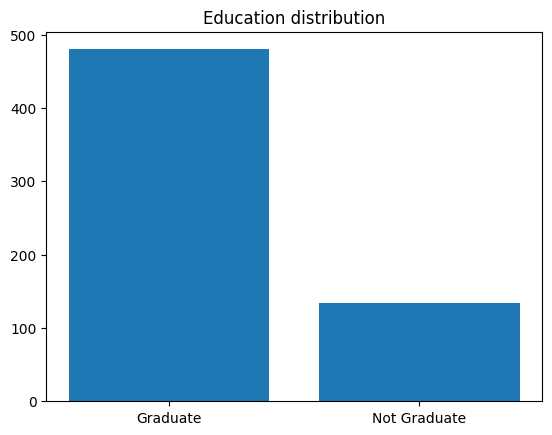

In [35]:
# Plot a bar chart showing education distribution in the data set
plt.bar(education_dist.index, education_dist.values)
plt.title('Education distribution')

plt.show()

In [36]:
# Count the number of applicant income entries
applicant_income_count = df['ApplicantIncome'].count()
applicant_income_count

614

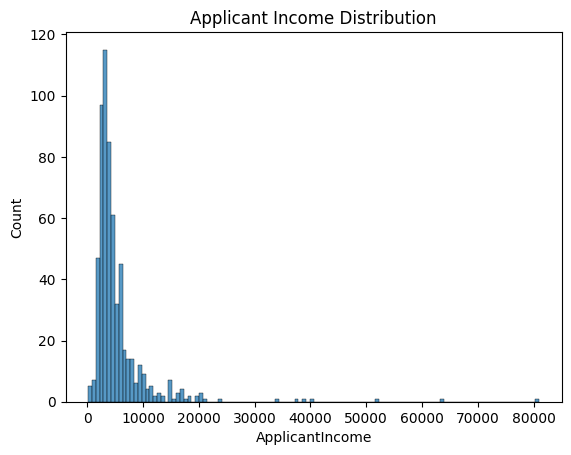

In [37]:
# Plot the frequency of applicant income in the data set
sns.histplot(data= df['ApplicantIncome'])
plt.title('Applicant Income Distribution')
plt.show()

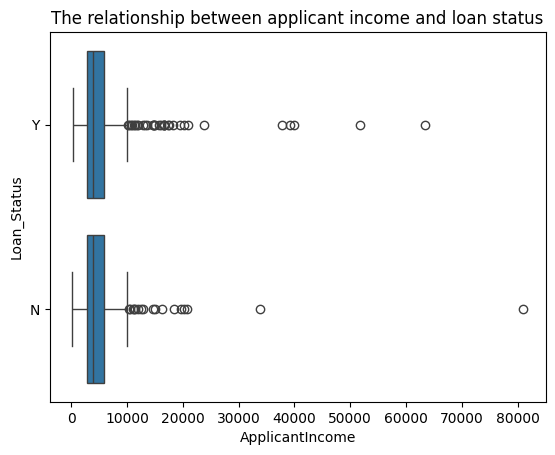

In [38]:
# Plot a boxplot to show the relationship between applicant income and loan status
sns.boxplot(y= 'Loan_Status', x= 'ApplicantIncome', data = df)
plt.title('The relationship between applicant income and loan status')
plt.show()

In [39]:
# Find the first quantile, third quantile, and interquantile range
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)

applicantinc_IQR = Q3 - Q1

print(f'The interquantile range for applicant income is:{applicantinc_IQR}')

The interquantile range for applicant income is:2917.5


In [40]:
# Using the results above, find the lower and upper bounds
lower_bound = Q1 - 1.5* applicantinc_IQR
upper_bound = Q3 + 1.5* applicantinc_IQR

print('The lower bound of applicant income is:',lower_bound)
print(f'The upper bound of the applicant income is {upper_bound}')

The lower bound of applicant income is: -1498.75
The upper bound of the applicant income is 10171.25


In [41]:
# Remove outliers
df = df[(df['ApplicantIncome']>= lower_bound) & (df['ApplicantIncome']<= upper_bound)]

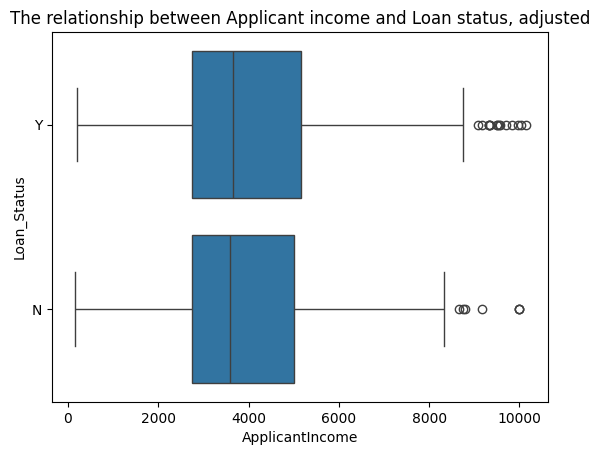

In [42]:
# Plot a boxplot without outliers
sns.boxplot(x= 'ApplicantIncome', y= 'Loan_Status', data=df)
plt.title('The relationship between Applicant income and Loan status, adjusted')
plt.show()

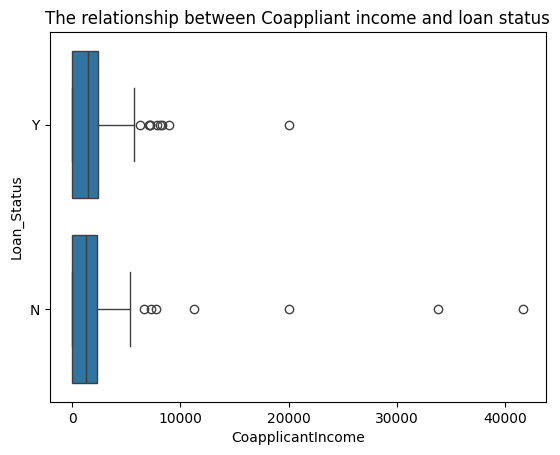

In [43]:
# Plot a boxplot to show the relationship between coappliant income and loan status
sns.boxplot(x= 'CoapplicantIncome', y='Loan_Status', data = df)
plt.title('The relationship between Coappliant income and loan status')

plt.show()


In [44]:
# Find the first quantile, third quantile, and interquantile range
Q1b = df['CoapplicantIncome'].quantile(0.25)
Q3b = df['CoapplicantIncome'].quantile(0.75)

IQR = Q3b - Q1b

print(f'The interquantile range for coapplicant income is {IQR}')

The interquantile range for coapplicant income is 2337.0


In [45]:
# Use the above results to calculate the lower and upper bounds
lower_bound2 = Q1b - 1.5 * IQR
upper_bound2 = Q3b + 1.5 * IQR

print(f'The lower bound of coapplicant income is {lower_bound2}')
print(f"The upper bound of coapplicant income is {upper_bound2}")

The lower bound of coapplicant income is -3505.5
The upper bound of coapplicant income is 5842.5


In [46]:
# Remove the outliers
df = df[(df['CoapplicantIncome'] >= lower_bound2) & (df['CoapplicantIncome'] <= upper_bound2)]

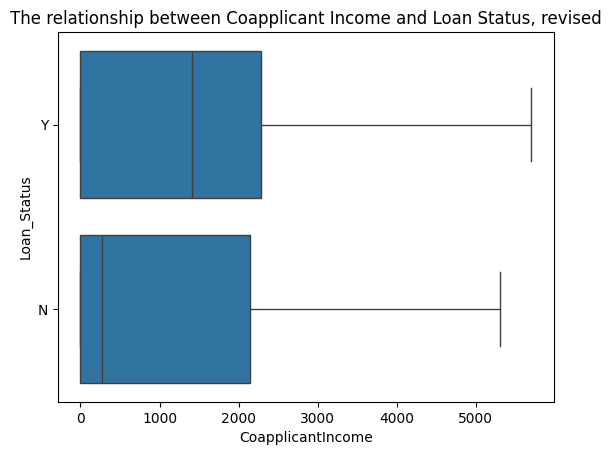

In [47]:
# Plot the revised box plot to show the relationship between loan status and coappliant income, now without the outliers
sns.boxplot(x= 'CoapplicantIncome', y= 'Loan_Status', data = df)
plt.title('The relationship between Coapplicant Income and Loan Status, revised')
plt.show()

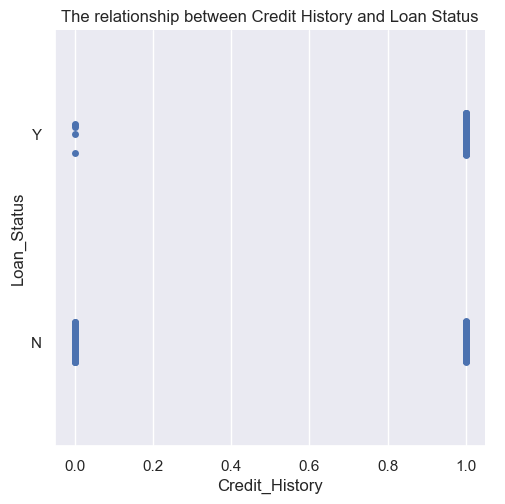

In [52]:
# Plot a catplot 
sns.set(rc={'figure.figsize':(6,6)})
sns.catplot(x= 'Credit_History', y= 'Loan_Status', data= df)
plt.title('The relationship between Credit History and Loan Status')
plt.show()

## Logistic Regression

In [53]:
# Take a quick look at out clean dataset before building a model
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [54]:
# Choose features(X) and labels(y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [57]:
# Check the shape of the features dataframe
X.shape

(548, 11)

In [58]:
# Check the shape of the labels dataframe
y.shape

(548,)

In [60]:
# Transform the categorical features columns 
X_transformed = pd.get_dummies(X, drop_first = True, dtype = int)
X_transformed.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1


In [102]:
X_transformed.shape

(548, 14)

In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_transformed)


In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42) 

## Feature Selection

## Full Model- using all features

In [84]:
from sklearn.linear_model import LogisticRegression

model_full = LogisticRegression()
model_full.fit(X_train, y_train)


LogisticRegression()

In [85]:
y_pred_full = model_full.predict(X_test)

In [86]:
from sklearn.metrics import classification_report

print('Full Model using all features')
print(classification_report(y_test, y_pred_full, target_names=['Y', 'N']))

Full Model using all features
              precision    recall  f1-score   support

           Y       0.94      0.49      0.64        35
           N       0.80      0.99      0.89        75

    accuracy                           0.83       110
   macro avg       0.87      0.74      0.76       110
weighted avg       0.85      0.83      0.81       110



In [87]:
from sklearn.metrics import accuracy_score

print("Accuracy with no feature scaling :", accuracy_score(y_pred_full, y_test))

Accuracy with no feature scaling : 0.8272727272727273


## Selection by variance thresholding

In [89]:
# Get the logistic regression instance for variance thresholding

model_vt = LogisticRegression()


In [112]:
# Import the variance threshold model and choose an appropriate threshold 
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold = 0.09)

# Fit and transform the training data using fit_transform()
X_train_vt = selector.fit_transform(X_train)

In [113]:
# Check if some features have been dropped
X_train_vt.shape

(438, 9)

In [114]:
# Fit model to the transformed data
model_vt.fit(X_train_vt, y_train)

LogisticRegression()

In [115]:
# Remove the same features we did in the variance thresholding process
X_test_vt = selector.transform(X_test)

# Predict target values(y) from the model
pred_model_vt = model_vt.predict(X_test_vt)

In [116]:
print('Variance Thresholding')
print(classification_report(y_test, pred_model_vt, target_names=['Y', 'N']))

Variance Thresholding
              precision    recall  f1-score   support

           Y       0.94      0.49      0.64        35
           N       0.80      0.99      0.89        75

    accuracy                           0.83       110
   macro avg       0.87      0.74      0.76       110
weighted avg       0.85      0.83      0.81       110



In [118]:
print("Accuracy with variance threshold :", accuracy_score(pred_model_vt, y_test))

Accuracy with variance threshold : 0.8272727272727273


## Selection by choosing k-best features

In [119]:
# LogisticRegression model for KBest
model_kbest = LogisticRegression()

In [121]:
# Import the feature selector module
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Set up the chosen selector, choose a score function, and number of k features to retain in our model
selector_kbest = SelectKBest(score_func=mutual_info_classif, k=9)

# Fit and transform the training data
X_train_kbest = selector_kbest.fit_transform(X_train, y_train)

In [123]:
# Check if the transformation has reduced the number of features to k value
X_train_kbest.shape

(438, 9)

In [124]:
# Fit model to the transformed data
model_kbest.fit(X_train_kbest, y_train)

LogisticRegression()

In [125]:
# Transform the test data like we did to the train data
X_test_kbest = selector_kbest.transform(X_test)

# Generate predictions from the selectKBest model
y_pred_kbest = model_kbest.predict(X_test_kbest)

In [126]:
print('Select KBest')
print(classification_report(y_test, y_pred_kbest, target_names=['Y', 'N']))

Select KBest
              precision    recall  f1-score   support

           Y       0.94      0.49      0.64        35
           N       0.80      0.99      0.89        75

    accuracy                           0.83       110
   macro avg       0.87      0.74      0.76       110
weighted avg       0.85      0.83      0.81       110



In [127]:
print("Accuracy with Select KBest :", accuracy_score(y_pred_kbest, y_test))

Accuracy with variance threshold : 0.8272727272727273


## Selection using forward stepwise selection

In [157]:
!pip install mlxtend

python(21043) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [158]:
# Calling the logistic regression model
lm_sfs = LogisticRegression()

In [159]:
# Import necessary models
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.metrics import f1_score

In [172]:
# Building out forward stepwise feature selector
sfs1 = sfs(lm_sfs, k_features=14, forward=True, scoring='accuracy', cv= 5)

In [173]:
# Fit our model
sfs1 = sfs1.fit(X_train, y_train)

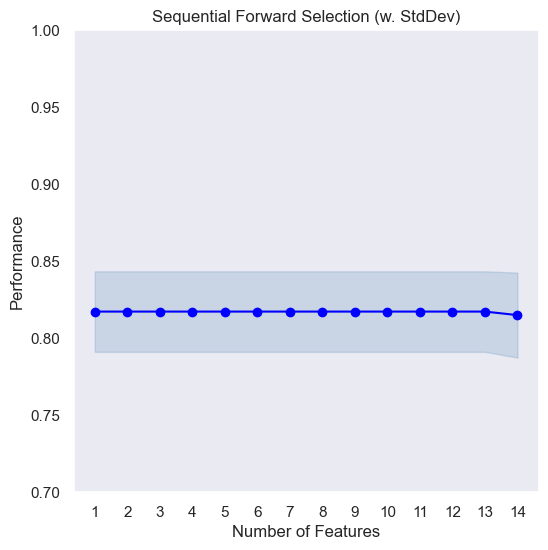

In [174]:
# Plot results
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')

plt.ylim([0.7, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

Plotting the results, we can see that performance is constant from the 1st to the 13th feature. Performance slightly drops off at the 14th feature. Do the number of features in our model really matter?

In [175]:
# Extract the feature names for the optimal number using the dictionary provided by the subsets_ method
columns = list(sfs1.subsets_[13]['feature_idx'])

In [176]:
# Select these specific features that show good enough perfomance
X_train_sfs = X_train[:, columns]
X_test_sfs = X_test[:, columns]

In [177]:
X_train_sfs.shape

(438, 13)

In [178]:
# Fit the model
lm_sfs.fit(X_train_sfs, y_train)

LogisticRegression()

In [179]:
# Let's generate some predictions
pred_lm_sfs = lm_sfs.predict(X_test_sfs)

In [180]:
print('SFS Model')
print(classification_report(y_test, pred_lm_sfs, target_names=['Y', 'N']))

SFS Model
              precision    recall  f1-score   support

           Y       0.94      0.49      0.64        35
           N       0.80      0.99      0.89        75

    accuracy                           0.83       110
   macro avg       0.87      0.74      0.76       110
weighted avg       0.85      0.83      0.81       110



In [181]:
print("Accuracy with SFS Model :", accuracy_score(pred_lm_sfs , y_test))

Accuracy with SFS Model : 0.8272727272727273


Interestingly, all models achieve similar accuracy. All models yield similar figures in precision, accuracy, recall, and F1 score. Feature selection doesn't seem to improve the performance of the model. Perhaps the problem lies within the dataset. Could the dataset be imbalanced, or does it provide insufficient data that makes it impossible to improve accuracy?